










**Corpus to train**

In [ ]:
#read the corpus(this is a sample file, upload task specific corpus in corpus text file and proceed)
corpus=open("corpus.txt").read()

In [ ]:
corpus

'Next Word Prediction is also called Language Modeling. It is the task of predicting what word comes next. It is one of the fundamental tasks of NLP and has many applications. You might be using it daily when you write texts or emails without realizing it.'

In [ ]:
#preprocess the corpus
import re
corpus=corpus.lower()
clean_corpus=re.sub('[^a-z0-9]+',' ', corpus)

In [ ]:
clean_corpus

'next word prediction is also called language modeling it is the task of predicting what word comes next it is one of the fundamental tasks of nlp and has many applications you might be using it daily when you write texts or emails without realizing it '

 **Data Preparation**

In [ ]:
#required libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#tokenizing the text into words
tokens = word_tokenize(clean_corpus)
tokens


['next',
 'word',
 'prediction',
 'is',
 'also',
 'called',
 'language',
 'modeling',
 'it',
 'is',
 'the',
 'task',
 'of',
 'predicting',
 'what',
 'word',
 'comes',
 'next',
 'it',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'tasks',
 'of',
 'nlp',
 'and',
 'has',
 'many',
 'applications',
 'you',
 'might',
 'be',
 'using',
 'it',
 'daily',
 'when',
 'you',
 'write',
 'texts',
 'or',
 'emails',
 'without',
 'realizing',
 'it']

In [ ]:
#length of the sequence to train
train_len = 3

In [ ]:
#converting the data into required sequence
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
text_sequences

[['next', 'word', 'prediction'],
 ['word', 'prediction', 'is'],
 ['prediction', 'is', 'also'],
 ['is', 'also', 'called'],
 ['also', 'called', 'language'],
 ['called', 'language', 'modeling'],
 ['language', 'modeling', 'it'],
 ['modeling', 'it', 'is'],
 ['it', 'is', 'the'],
 ['is', 'the', 'task'],
 ['the', 'task', 'of'],
 ['task', 'of', 'predicting'],
 ['of', 'predicting', 'what'],
 ['predicting', 'what', 'word'],
 ['what', 'word', 'comes'],
 ['word', 'comes', 'next'],
 ['comes', 'next', 'it'],
 ['next', 'it', 'is'],
 ['it', 'is', 'one'],
 ['is', 'one', 'of'],
 ['one', 'of', 'the'],
 ['of', 'the', 'fundamental'],
 ['the', 'fundamental', 'tasks'],
 ['fundamental', 'tasks', 'of'],
 ['tasks', 'of', 'nlp'],
 ['of', 'nlp', 'and'],
 ['nlp', 'and', 'has'],
 ['and', 'has', 'many'],
 ['has', 'many', 'applications'],
 ['many', 'applications', 'you'],
 ['applications', 'you', 'might'],
 ['you', 'might', 'be'],
 ['might', 'be', 'using'],
 ['be', 'using', 'it'],
 ['using', 'it', 'daily'],
 ['it', 'd

In [ ]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[7, 6, 8],
 [6, 8, 2],
 [8, 2, 9],
 [2, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 1],
 [12, 1, 2],
 [1, 2, 4],
 [2, 4, 13],
 [4, 13, 3],
 [13, 3, 14],
 [3, 14, 15],
 [14, 15, 6],
 [15, 6, 16],
 [6, 16, 7],
 [16, 7, 1],
 [7, 1, 2],
 [1, 2, 17],
 [2, 17, 3],
 [17, 3, 4],
 [3, 4, 18],
 [4, 18, 19],
 [18, 19, 3],
 [19, 3, 20],
 [3, 20, 21],
 [20, 21, 22],
 [21, 22, 23],
 [22, 23, 24],
 [23, 24, 5],
 [24, 5, 25],
 [5, 25, 26],
 [25, 26, 27],
 [26, 27, 1],
 [27, 1, 28],
 [1, 28, 29],
 [28, 29, 5],
 [29, 5, 30],
 [5, 30, 31],
 [30, 31, 32],
 [31, 32, 33],
 [32, 33, 34],
 [33, 34, 35],
 [34, 35, 1]]

In [ ]:
sequences=np.asarray(sequences)

In [ ]:
#vocabulary size
vocabulary_size = len(tokenizer.word_counts)+1
vocabulary_size

36

In [ ]:
#trainX
train_inputs=sequences[:,:-1]

In [ ]:
train_inputs

array([[ 7,  6],
       [ 6,  8],
       [ 8,  2],
       [ 2,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  2],
       [ 2,  4],
       [ 4, 13],
       [13,  3],
       [ 3, 14],
       [14, 15],
       [15,  6],
       [ 6, 16],
       [16,  7],
       [ 7,  1],
       [ 1,  2],
       [ 2, 17],
       [17,  3],
       [ 3,  4],
       [ 4, 18],
       [18, 19],
       [19,  3],
       [ 3, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24,  5],
       [ 5, 25],
       [25, 26],
       [26, 27],
       [27,  1],
       [ 1, 28],
       [28, 29],
       [29,  5],
       [ 5, 30],
       [30, 31],
       [31, 32],
       [32, 33],
       [33, 34],
       [34, 35]])

In [ ]:
#input sequence length
seq_length=train_inputs.shape[1]
seq_length

2

In [ ]:
#trainY
train_targets=sequences[:,-1]

In [ ]:
train_targets

array([ 8,  2,  9, 10, 11, 12,  1,  2,  4, 13,  3, 14, 15,  6, 16,  7,  1,
        2, 17,  3,  4, 18, 19,  3, 20, 21, 22, 23, 24,  5, 25, 26, 27,  1,
       28, 29,  5, 30, 31, 32, 33, 34, 35,  1])

In [ ]:
#one hot encoding
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)

In [ ]:
train_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Let's build the model!**

In [ ]:
#required libraries
import torch
from torch.optim import Adam
import torch.nn as nn

In [ ]:
#lstm model
class lstm(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        #simple lookup table that stores embeddings of a fixed dictionary and size.
        self.embed = nn.Embedding(vocab_size, embed_size)

        #lstm
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=False)

        #fully connected layer
        self.linear = nn.Linear(hidden_size*seq_length,vocab_size)

    def forward(self, input_word):
        #input sequence to embeddings
        embedded = self.embed(input_word)

        #passing the embedding to lstm model
        output, hidden = self.lstm(embedded)

        #reshaping
        output=output.view(output.size(0), -1)

        #fully connected layer
        output = self.linear(output)
        return output,hidden



In [ ]:
model=lstm(vocab_size=vocabulary_size,embed_size=128, hidden_size=256)

In [ ]:
model

lstm(
  (embed): Embedding(36, 128)
  (lstm): LSTM(128, 256, num_layers=2)
  (linear): Linear(in_features=512, out_features=36, bias=True)
)

In [ ]:
#Adam optimizer
optimizer= Adam(model.parameters(), lr=0.07)

#loss
criterion = nn.BCEWithLogitsLoss()

In [ ]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0

    #clearing the Gradients
    optimizer.zero_grad()

    #predict the output
    y_pred, (state_h, state_c) = model(torch.from_numpy(train_inputs))

    #compute the loss
    loss=criterion(y_pred,torch.from_numpy(train_targets))
    losses.append(loss)

    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    print("Epoch : ",epoch,"loss : ",loss)

In [ ]:
#number of epoch
no_epoch=50
losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(0.6921, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  2 loss :  tensor(0.4604, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  3 loss :  tensor(2.2618, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  4 loss :  tensor(2.1587, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  5 loss :  tensor(0.1747, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  6 loss :  tensor(0.1978, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  7 loss :  tensor(0.2679, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  8 loss :  tensor(0.3112, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  9 loss :  tensor(0.3115, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  10 loss :  tensor(0.3001, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  11 loss :  tensor(0.2743, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  12 loss :  tensor(0.2470, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
E

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# Print the type of the losses variable
print(type(losses))

<class 'list'>


In [ ]:
import numpy as np
np.ndarray

numpy.ndarray

In [ ]:
print(type(losses))

<class 'list'>


In [ ]:
losses = torch.tensor(losses)

In [ ]:
losses = losses.detach()

In [ ]:
losses = losses.numpy()

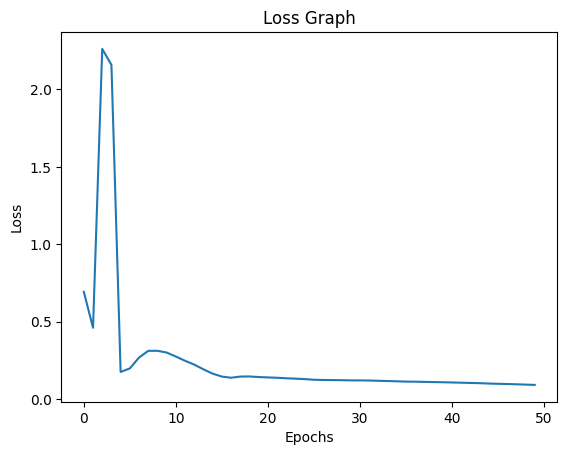

In [ ]:

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


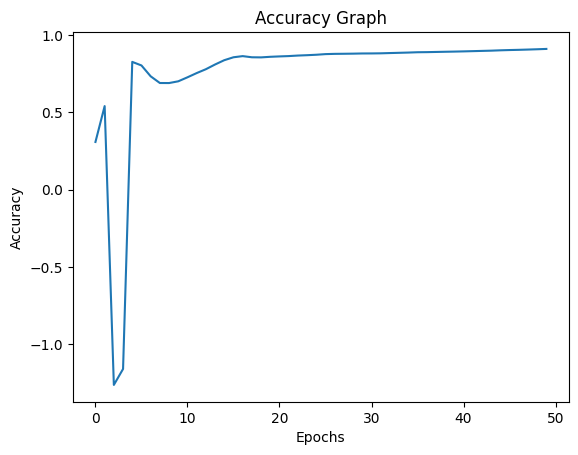

In [ ]:
# plot the accuracy

import matplotlib.pyplot as plt
import numpy as np
# Convert the losses list to a NumPy array
losses_array = np.array(losses)

# Calculate the number of epochs
num_epochs = len(losses_array)

# Calculate the accuracy for each epoch
accuracy = 1 - losses_array

# Plot the accuracy
plt.plot(range(num_epochs), accuracy)

# Set the title and axis labels
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


In [ ]:
#  calculate the accuracy of the model

import numpy as np
# Convert the losses list to a NumPy array
losses_array = np.array(losses)

# Calculate the number of epochs
num_epochs = len(losses_array)

# Calculate the accuracy for each epoch
accuracy = 1 - losses_array

# Calculate the average accuracy
Accuracy = np.mean(accuracy)

# Print the average accuracy
print("Accuracy of the Model :", abs(Accuracy))


Accuracy of the Model : 0.75273186


**Prediction**

In [ ]:
def predict_next_word(text):
    # Set the model to evaluation mode
    model.eval()

    # Preprocess the input text
    text = text.lower().strip()

    # Tokenize the input text
    input_tokens = word_tokenize(text)

    # Convert tokens to integer sequence
    sequences = tokenizer.texts_to_sequences([input_tokens])

    # Convert sequences to numpy array
    sequences = np.asarray(sequences)

    with torch.no_grad():
        # Convert sequences to tensor and ensure it's of type torch.LongTensor
        sequences = torch.from_numpy(sequences).long()

        # Predict the output
        predict, (hidden, cell) = model(sequences)

    # Get the output from the LSTM
    output = predict[-1]  # Get the output of the last time step

    # Apply softmax layer
    softmax = torch.exp(output)
    prob = list(softmax.numpy())

    # Get the index of the predicted word
    predictions = np.argmax(prob)

    # Convert the index back to word
    next_word = tokenizer.sequences_to_texts([[predictions]])
    return next_word[0]  # Return the first prediction


*Example-1*

In [ ]:
#we trained our model with sequence length of 2
input_text=input("Give Input Text :")
print(input_text)

Give Input Text :Next Word
Next Word


In [ ]:
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


'prediction'

*Example-2*

In [ ]:
#we trained our model with sequence length of 2
input_text="emails without"

In [ ]:
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


'is'